In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from prophet import Prophet

#import nypd crime data
crime_df= pd.read_csv('extended_nypd_crime_data.csv')

In [5]:
# create a dataframe with only the columns we need: cmplnt_fr_dt, cmplnt_fr_tm, rpt_dt, ofns_desc, boro_nm, susp_age_group
crime3_df = crime_df[['cmplnt_fr_dt', 'cmplnt_fr_tm', 'ofns_desc', 'boro_nm', 'vic_age_group', 'susp_age_group', 'vic_sex','susp_sex']]

#drop rows with null values from boro_nm and do not include in dataframe
crime3_df = crime3_df.dropna(subset=['boro_nm'])


crime3_df.head(25)

,cmplnt_fr_dt,cmplnt_fr_tm,ofns_desc,boro_nm,vic_age_group,susp_age_group,vic_sex,susp_sex
0,2010-10-27T00:00:00.000,19:30:00,PETIT LARCENY,BRONX,45-64,(null),F,(null)
1,2021-05-24T00:00:00.000,03:00:00,PETIT LARCENY,BRONX,45-64,UNKNOWN,M,U
2,2010-02-10T00:00:00.000,12:00:00,PETIT LARCENY,STATEN ISLAND,25-44,(null),M,(null)
3,2010-02-09T00:00:00.000,15:00:00,PETIT LARCENY,STATEN ISLAND,45-64,(null),M,(null)
4,2010-07-29T00:00:00.000,08:00:00,PETIT LARCENY,STATEN ISLAND,65+,(null),F,(null)
5,2010-07-05T00:00:00.000,08:00:00,PETIT LARCENY,STATEN ISLAND,25-44,(null),F,(null)
6,2010-11-09T00:00:00.000,12:00:00,PETIT LARCENY,STATEN ISLAND,25-44,(null),M,(null)
7,2010-11-20T00:00:00.000,17:00:00,PETIT LARCENY,STATEN ISLAND,18-24,(null),F,(null)
8,2010-08-30T00:00:00.000,12:00:00,PETIT LARCENY,STATEN ISLAND,25-44,45-64,F,F
9,2010-07-24T00:00:00.000,11:00:00,PETIT LARCENY,STATEN ISLAND,65+,(null),M,(null)


In [16]:
# create a list of the desired age groups
age_groups = ['45-64', '25-44', '65+', '18-24', '<18']

# filter the DataFrame
victim_age_df = crime3_df[crime3_df['vic_age_group'].isin(age_groups)]

victim_age_df.head(25)


,cmplnt_fr_dt,cmplnt_fr_tm,ofns_desc,boro_nm,vic_age_group,susp_age_group,vic_sex,susp_sex
0,2010-10-27T00:00:00.000,19:30:00,PETIT LARCENY,BRONX,45-64,(null),F,(null)
1,2021-05-24T00:00:00.000,03:00:00,PETIT LARCENY,BRONX,45-64,UNKNOWN,M,U
2,2010-02-10T00:00:00.000,12:00:00,PETIT LARCENY,STATEN ISLAND,25-44,(null),M,(null)
3,2010-02-09T00:00:00.000,15:00:00,PETIT LARCENY,STATEN ISLAND,45-64,(null),M,(null)
4,2010-07-29T00:00:00.000,08:00:00,PETIT LARCENY,STATEN ISLAND,65+,(null),F,(null)
5,2010-07-05T00:00:00.000,08:00:00,PETIT LARCENY,STATEN ISLAND,25-44,(null),F,(null)
6,2010-11-09T00:00:00.000,12:00:00,PETIT LARCENY,STATEN ISLAND,25-44,(null),M,(null)
7,2010-11-20T00:00:00.000,17:00:00,PETIT LARCENY,STATEN ISLAND,18-24,(null),F,(null)
8,2010-08-30T00:00:00.000,12:00:00,PETIT LARCENY,STATEN ISLAND,25-44,45-64,F,F
9,2010-07-24T00:00:00.000,11:00:00,PETIT LARCENY,STATEN ISLAND,65+,(null),M,(null)


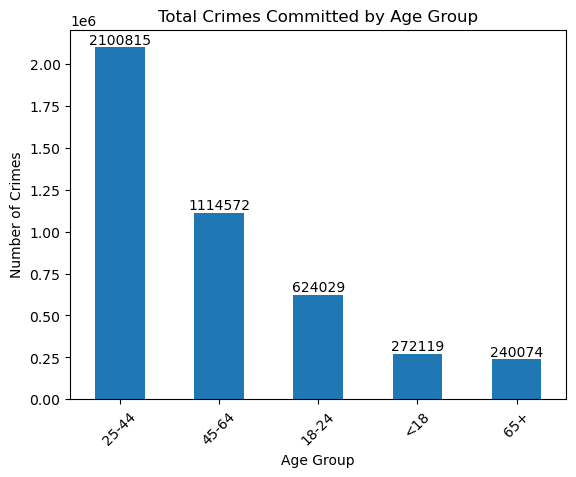

In [19]:
#create a bar chart showing the total crimes commited towards each indidual victim age group
age_group_counts = victim_age_df['vic_age_group'].value_counts()
age_group_counts.plot(kind='bar')
plt.title('Total Crimes Committed by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Crimes')

#put x axis labels on 45 degree angle
plt.xticks(rotation=45)

# put totals on top of bars
for i in range(len(age_group_counts)):
    plt.text(i, age_group_counts[i], str(age_group_counts[i]), ha='center', va='bottom')

#show the plot    
plt.show()


In [28]:
# group the data by age group and crime type and count the number of occurrences
crime_counts = victim_age_df.groupby(['vic_age_group', 'ofns_desc']).size()

# find the top 5 crimes in each age group
top_5_crimes = crime_counts.groupby(level=0).nlargest(5)

# convert the result to a DataFrame
top_5_crimes_df = top_5_crimes.to_frame()

# print the DataFrame
print(top_5_crimes_df)

                                                                 0
vic_age_group vic_age_group ofns_desc                             
18-24         18-24         ASSAULT 3 & RELATED OFFENSES    129452
                            HARRASSMENT 2                    96499
                            PETIT LARCENY                    80675
                            GRAND LARCENY                    68436
                            FELONY ASSAULT                   47829
25-44         25-44         HARRASSMENT 2                   379994
                            PETIT LARCENY                   321001
                            ASSAULT 3 & RELATED OFFENSES    312972
                            GRAND LARCENY                   220503
                            CRIMINAL MISCHIEF & RELATED OF  183198
45-64         45-64         HARRASSMENT 2                   234794
                            PETIT LARCENY                   176329
                            ASSAULT 3 & RELATED OFFENSES    13

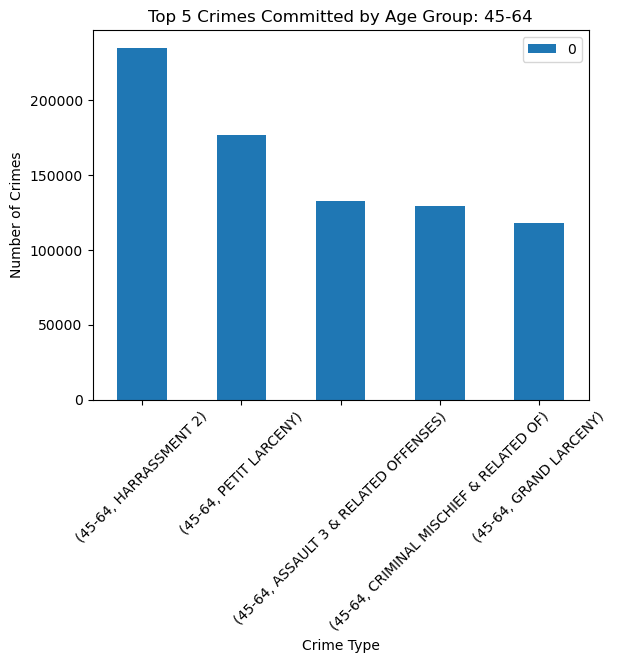

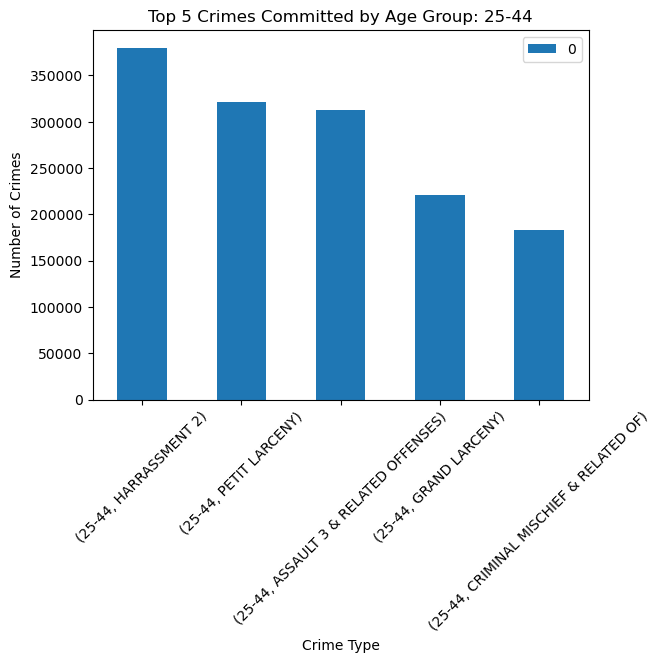

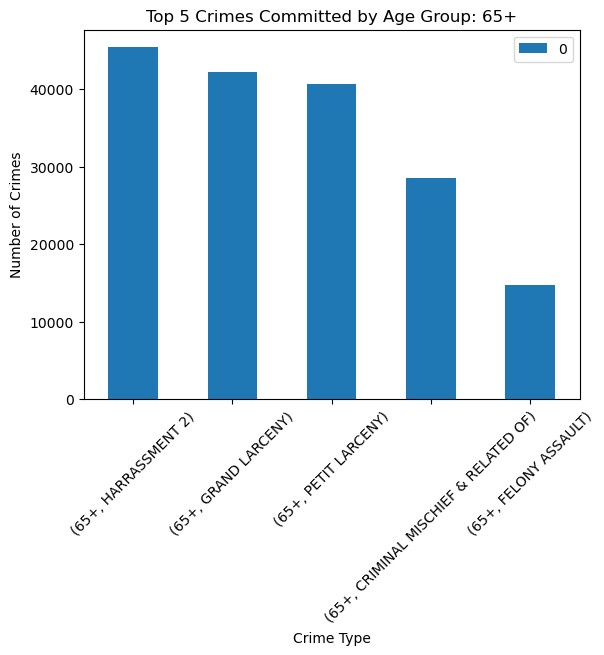

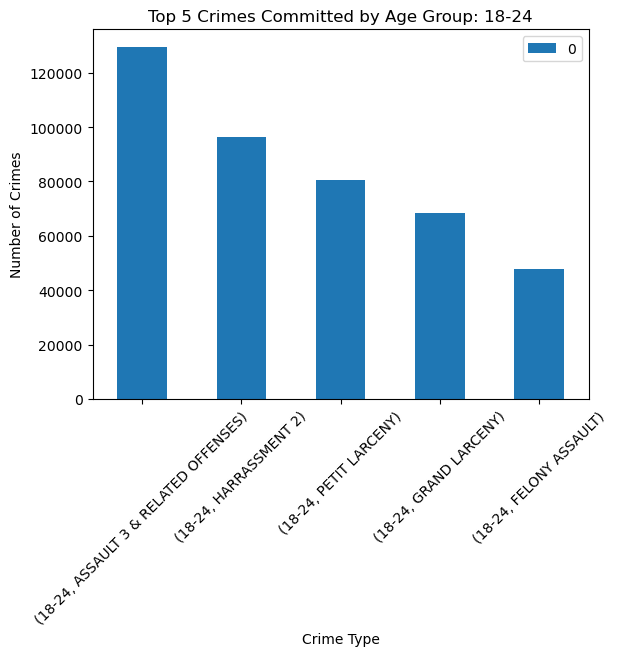

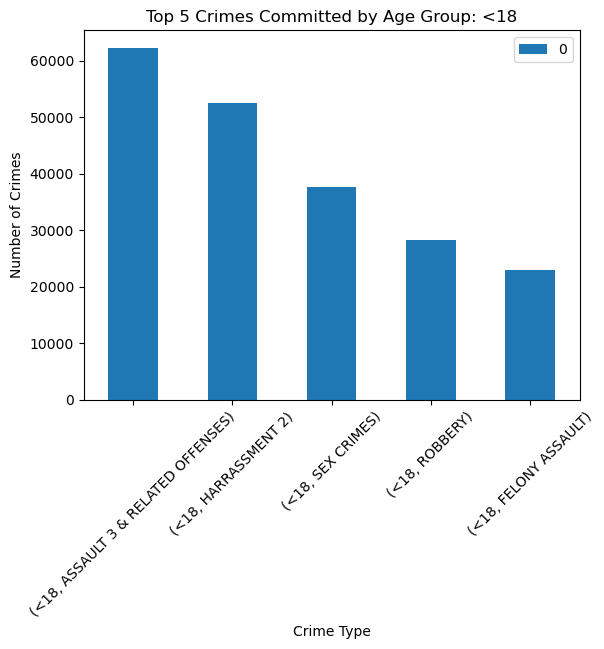

In [29]:
#create a bar chart for each age group showing the top 5 crimes commited
for age_group in age_groups:
    top_5_crimes_df.loc[age_group].plot(kind='bar')
    plt.title(f'Top 5 Crimes Committed by Age Group: {age_group}')
    plt.xlabel('Crime Type')
    plt.ylabel('Number of Crimes')
    plt.xticks(rotation=45)
    plt.show()
